In [1]:
# importing major libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Polynomial.csv').drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,X,Y
0,0.531918,2.340268
1,0.288274,2.583564
2,2.659518,9.311467
3,-1.360948,3.290790
4,-0.949151,3.710895


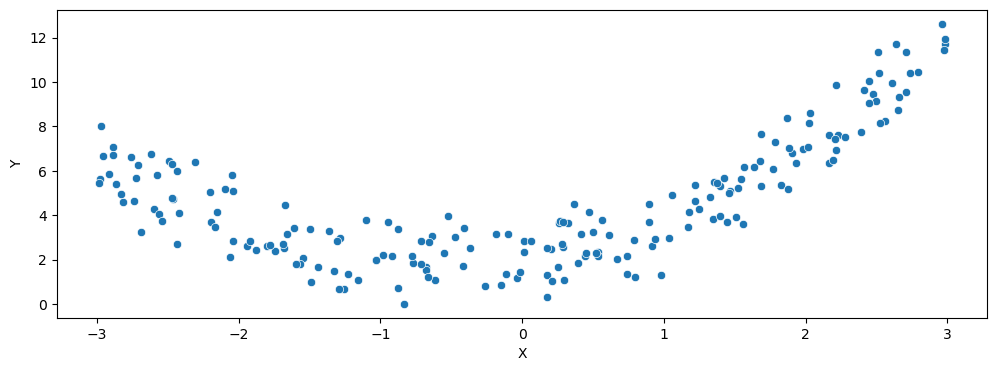

In [9]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=df.X,y=df.Y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:1]
y = df.Y

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

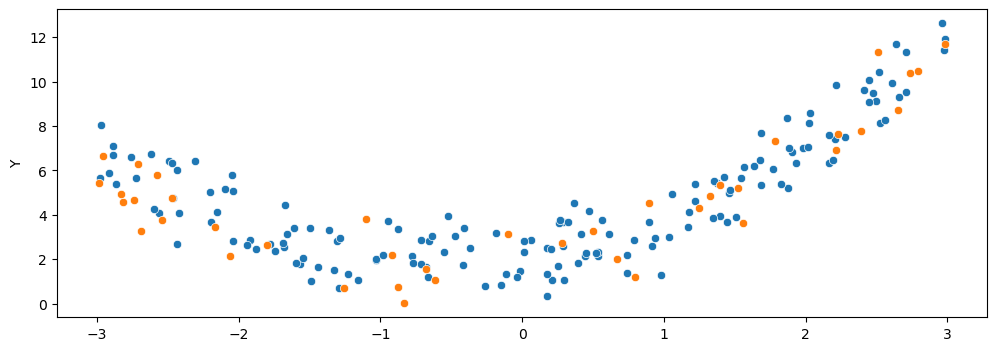

In [26]:
x_train.shape
x_test.shape

plt.figure(figsize=(12,4))
sns.scatterplot(x=x_train.values.ravel(),y=y_train)
sns.scatterplot(x=x_test.values.ravel(),y=y_test)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr

LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2377217497370927

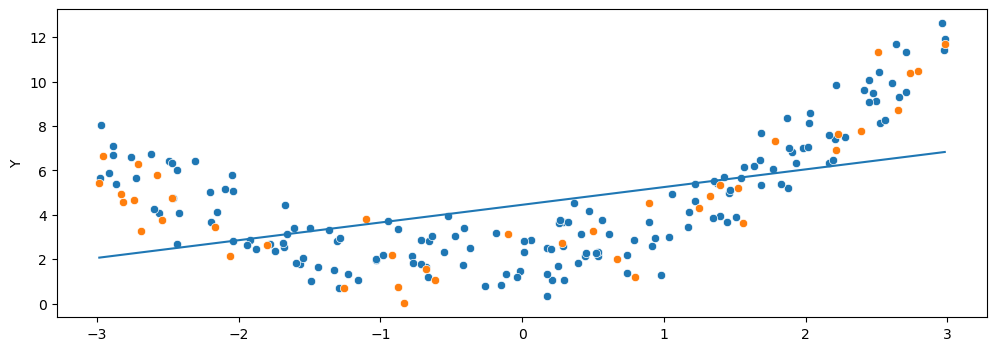

In [37]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=x_train.values.ravel(),y=y_train)
sns.scatterplot(x=x_test.values.ravel(),y=y_test)
sns.lineplot(x=x_test.values.ravel(),y=y_pred,palette='r')
plt.show()

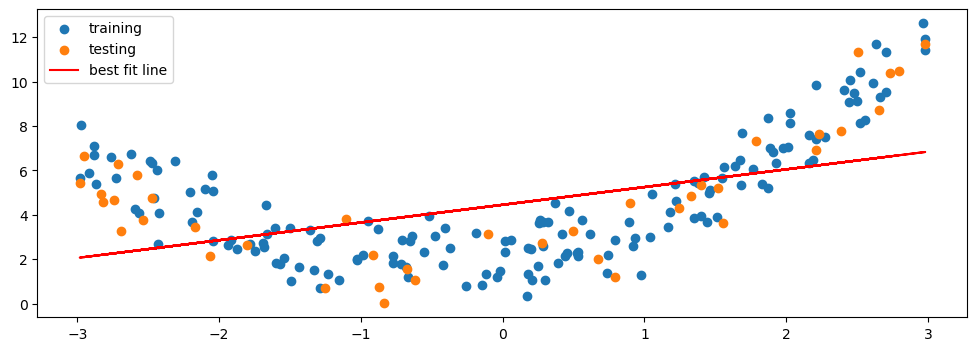

In [40]:
plt.figure(figsize=(12,4))
plt.scatter(x_train.values.ravel(),y_train,label='training')
plt.scatter(x_test.values.ravel(),y_test,label='testing')
plt.plot(x_test.values.ravel(),y_pred,color='r',label='best fit line')
plt.legend()
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

# quadratic 
poly = PolynomialFeatures(degree=2,include_bias=True)

In [57]:
poly

PolynomialFeatures()

In [58]:
# fit --> understand patterns
# fit_transform ---> understand patterns then transform
# transform --> transform 

# case1 
# fit ---> x_train
# transfrom -->x_train,x_test

# case2 
# fit_transfrom --> x_train
# transform -->x_test

In [59]:
# case1 

poly.fit(x_train)

PolynomialFeatures()

In [63]:
# transform 
x_train_df2 = poly.transform(x_train)
x_test_df2 = poly.transform(x_test)

In [69]:
pd.DataFrame(x_train_df2,columns=['x^0','x^1','x^2']).head()

,x^0,x^1,x^2
0,1.0,1.397611,1.953316
1,1.0,0.287318,0.082551
2,1.0,0.175370,0.030755
3,1.0,-0.409954,0.168063
4,1.0,-2.308627,5.329758


In [72]:
lr1 = LinearRegression()
lr1

LinearRegression()

In [73]:
lr1.fit(x_train_df2,y_train)

LinearRegression()

In [75]:
y_preddf2 = lr1.predict(x_test_df2)

In [76]:
r2_score(y_test,y_preddf2)

0.8422806489893417

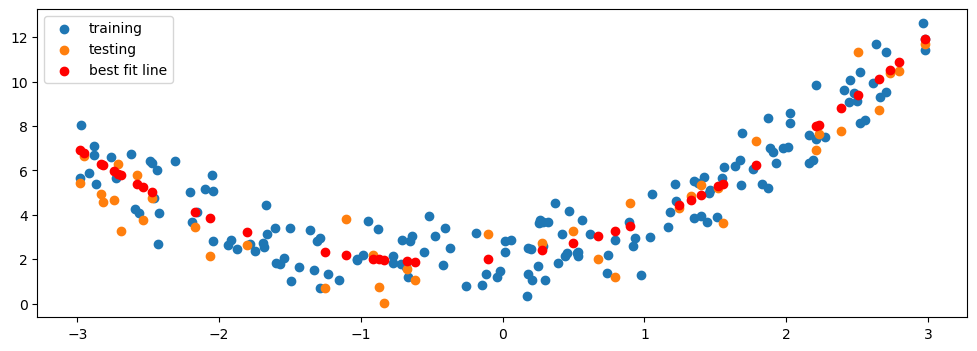

In [78]:
plt.figure(figsize=(12,4))
plt.scatter(x_train.values.ravel(),y_train,label='training')
plt.scatter(x_test.values.ravel(),y_test,label='testing')
plt.scatter(x_test.values.ravel(),y_preddf2,color='r',label='best fit line')
plt.legend()
plt.show()

In [104]:
# complex curves 
# df 4+

poly_com = PolynomialFeatures(degree=40,include_bias=True)
poly_com

PolynomialFeatures(degree=40)

In [105]:
poly_com.fit(x_train)

PolynomialFeatures(degree=40)

In [106]:
# transform 
x_train_com = poly_com.transform(x_train)
x_test_com = poly_com.transform(x_test)

In [107]:
# pd.DataFrame(x_test_com)

lr_com= LinearRegression()
lr_com

LinearRegression()

In [108]:
lr_com.fit(x_train_com,y_train)

LinearRegression()

In [109]:
y_pred_com = lr_com.predict(x_test_com)
y_pred_com

array([ 2.83608955, 13.168084  ,  4.29116029,  5.34293337,  7.3786057 ,
        0.90619247,  6.16936325,  8.20123072,  2.83435065,  3.61461591,
        4.96779034,  8.98286801,  2.83597327,  7.27614637,  2.86476461,
        2.83597215,  2.83596709,  4.11154718,  5.08472996,  2.83596571,
        2.91488174,  9.96308574,  7.14183647,  2.83592363,  7.56273251,
        6.09435502,  2.8359714 ,  5.62019438,  2.57645741,  3.41716129,
        2.82460525,  2.83588232,  2.83594504,  2.83597228,  5.35026337,
       10.86556559,  2.83598805,  9.07578764,  3.0128402 ,  5.3373498 ])

In [110]:
r2_score(y_test,y_pred_com)

0.42879772891412316

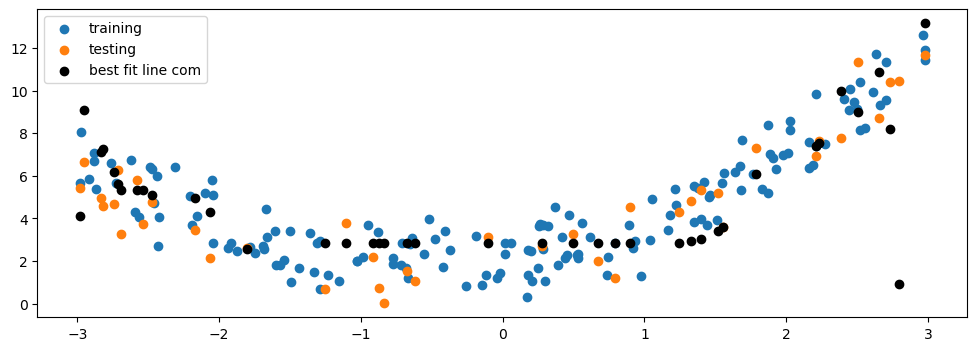

In [111]:
plt.figure(figsize=(12,4))
plt.scatter(x_train.values.ravel(),y_train,label='training')
plt.scatter(x_test.values.ravel(),y_test,label='testing')
plt.scatter(x_test.values.ravel(),y_pred_com,color='k',label='best fit line com')
# plt.scatter(x_test.values.ravel(),y_preddf2,color='r',label='best fit line df2')
plt.legend()
plt.show()

# overfitting issue 